<a href="https://colab.research.google.com/github/bhardwaj1230/NMT/blob/master/BT_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn-whitegrid')
%matplotlib inline
import numpy as np 
from matplotlib import rc
import matplotlib.patches as mpatches

def log_processor(location):
    
    with open(location) as f:
        data = f.readlines()

    data = [line.strip('\n') for line in data]
    acc = []
    for line in data:
        if '__log__' in line:
            s = line.find('{')
            e = line.find('}')
            acc.append(line[s+1 : e-1].split(','))
    log_data = []
    for i in acc:
        load=[]
        for j in i:
            load.append(re.sub("[^\d.]+", "", j))
        log_data.append(load)

    cols = ['epoch', 'valid_en_fr_mt_ppl', 'valid_en_fr_mt_acc', 'valid_en_fr_mt_bleu', 'test_en_fr_mt_ppl', 'test_en_fr_mt_acc', 'test_en_fr_mt_bleu']
    log_data = pd.DataFrame(log_data)
    log_data.columns = cols
    
    return log_data



#rc('figure', figsize=(9, 6))
rc('figure', figsize=(12, 8))
rc('axes', titlesize = 20, labelsize = 18, titleweight = 'bold')
rc('xtick', labelsize = 16, color = 'black')
rc('ytick', labelsize = 16, color = 'black')
rc('legend', fontsize = 16, handlelength = 2)

def plot_fnc(data):
    
    means = pd.Series(data).rolling(10, min_periods=1).mean()
    stds = pd.Series(data).rolling(10, min_periods=1).std()/4
    means.plot()
    plt.fill_between(range(len(means)),means - stds, means + stds, alpha=0.2)
    
    plt.xlabel('Epochs')
    plt.ylabel('BLEU Scores')


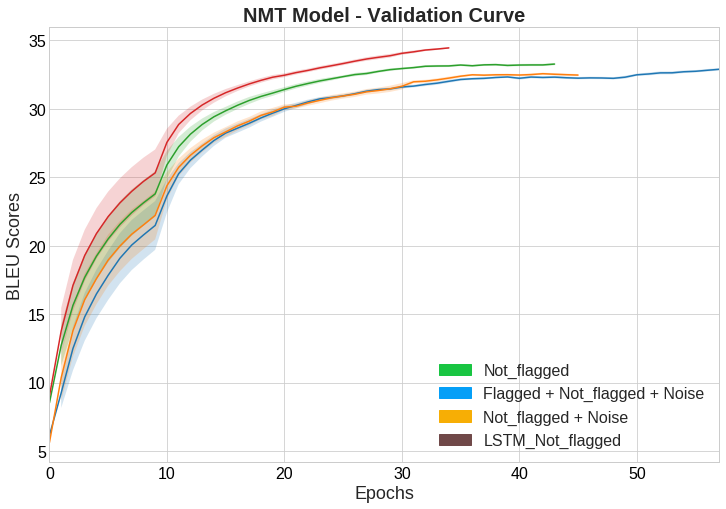

In [0]:
raw = log_processor('raw.log')
clean = log_processor('not_flag.log')
super_clean = log_processor('clean.log')
clean_test_lstm_clean = log_processor('clean_test_lstm_clean.log')

plot_fnc(raw['valid_en_fr_mt_bleu'])
plot_fnc(clean['valid_en_fr_mt_bleu'])
plot_fnc(super_clean['valid_en_fr_mt_bleu'])
plot_fnc(clean_test_lstm_clean['valid_en_fr_mt_bleu'])

plt.title('NMT Model - Validation Curve')
red_patch = mpatches.Patch(color ='#059FF7', label='Flagged + Not_flagged + Noise')
blue_patch = mpatches.Patch(color ='#F7AE05', label='Not_flagged + Noise')
purple_patch = mpatches.Patch(color ='#18C542', label='Not_flagged')
black_patch = mpatches.Patch(color ='#704949', label='LSTM_Not_flagged')
                             
plt.legend(handles=[purple_patch, red_patch, blue_patch, black_patch])

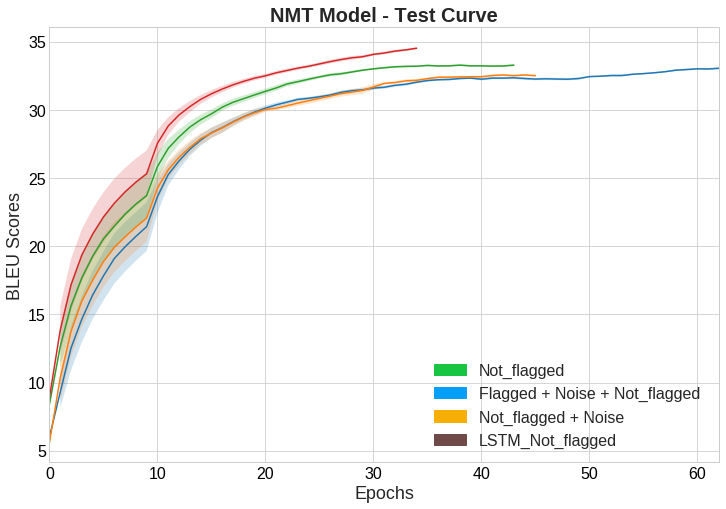

In [0]:
raw = log_processor('raw.log')
clean = log_processor('not_flag.log')
super_clean = log_processor('clean.log')

plot_fnc(raw['test_en_fr_mt_bleu'])
plot_fnc(clean['test_en_fr_mt_bleu'])
plot_fnc(super_clean['test_en_fr_mt_bleu'])
plot_fnc(clean_test_lstm_clean['test_en_fr_mt_bleu'])


plt.title('NMT Model - Test Curve')
red_patch = mpatches.Patch(color ='#059FF7', label='Flagged + Noise + Not_flagged ')
blue_patch = mpatches.Patch(color ='#F7AE05', label='Not_flagged + Noise')
purple_patch = mpatches.Patch(color ='#18C542', label='Not_flagged')
black_patch = mpatches.Patch(color ='#704949', label='LSTM_Not_flagged')
                             
plt.legend(handles=[purple_patch, red_patch, blue_patch, black_patch])

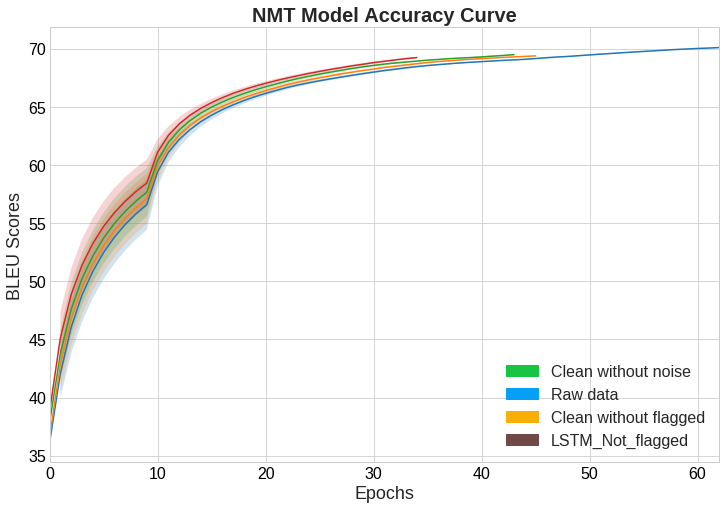

In [0]:
plot_fnc(raw['valid_en_fr_mt_acc'])
plot_fnc(clean['valid_en_fr_mt_acc'])
plot_fnc(super_clean['valid_en_fr_mt_acc'])
plot_fnc(clean_test_lstm_clean['valid_en_fr_mt_acc'])


plt.title('NMT Model Accuracy Curve')
red_patch = mpatches.Patch(color ='#059FF7', label='Raw data')
blue_patch = mpatches.Patch(color ='#F7AE05', label='Clean without flagged')
purple_patch = mpatches.Patch(color ='#18C542', label='Clean without noise')
black_patch = mpatches.Patch(color ='#704949', label='LSTM_Not_flagged')
                             
plt.legend(handles=[purple_patch, red_patch, blue_patch, black_patch])

In [0]:
raw = log_processor('raw_clean_test.out')
clean = log_processor('no_noise_clean_test.out')
super_clean = log_processor('no_noise_duplicate_clean_test.out')

plot_fnc(raw['valid_en_fr_mt_bleu'])
plot_fnc(clean['valid_en_fr_mt_bleu'])
plot_fnc(super_clean['valid_en_fr_mt_bleu'])

plt.title('NMT Model with clean-test')
red_patch = mpatches.Patch(color ='#059FF7', label='Raw data')
blue_patch = mpatches.Patch(color ='#F7AE05', label='Clean with duplicates')
purple_patch = mpatches.Patch(color ='#18C542', label='Clean without duplicates')
plt.legend(handles=[purple_patch, red_patch, blue_patch])

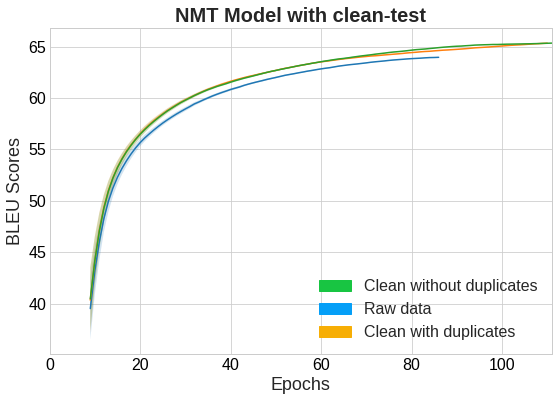

In [0]:
plot_fnc(raw['valid_en_fr_mt_acc'])
plot_fnc(clean['valid_en_fr_mt_acc'])
plot_fnc(super_clean['valid_en_fr_mt_acc'])

plt.title('NMT Model with clean-test')
red_patch = mpatches.Patch(color ='#059FF7', label='Raw data')
blue_patch = mpatches.Patch(color ='#F7AE05', label='Clean with duplicates')
purple_patch = mpatches.Patch(color ='#18C542', label='Clean without duplicates')
plt.legend(handles=[purple_patch, red_patch, blue_patch])

# Getting Word Count_Histogram for BT

In [0]:
import re
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn-whitegrid')
%matplotlib inline
import numpy as np 
from matplotlib import rc
import matplotlib.patches as mpatches
import pickle

In [0]:

flag_not_flagged # 4067846
not_flagged # 3287610
clean_flag_not_flagged # 2615926
lstm_clean_flag_not_flagged # 1999525
laser_flag_not_flagged # 2996133
D2randForest_clean_not_flagged # 2909209



def word_count(file_name):
	counts = dict()
	with open(file_name, 'r') as f:
		for line in f:
			words = line.split()
			for word in words:
				if word.lower() in counts:
					counts[word.lower()] += 1
				else:
					counts[word.lower()] = 1

	return counts

word_occurence = word_count('/fs/hestia_Hnrc/ict/bha101/nrc_collab_aitq/bt/train/flag_not_flagged/train.en-fr.en')


plot_dict = {'1':[],'2':[],'3':[],'4':[],'5':[],'6-8':[],'9-12':[],'13-16':[],'17-22':[],'23-32':[],'33-50':[],'51-70':[],'71-90':[],'91+':[]}
for key, item in word_occurence.items():
    if item == 1:
        plot_dict['1'].append(key)
    elif item == 2:
        plot_dict['2'].append(key)
    elif item == 3:
        plot_dict['3'].append(key)
    elif item == 4:
        plot_dict['4'].append(key)
    elif item == 5:
        plot_dict['5'].append(key)
    elif item > 5 and item <= 8:
        plot_dict['6-8'].append(key)
    elif item > 8 and item <= 12:
        plot_dict['9-12'].append(key)
    elif item > 12 and item <= 16:
        plot_dict['13-16'].append(key)
    elif item > 16 and item <= 22:
        plot_dict['17-22'].append(key)
    elif item > 22 and item <= 32:
        plot_dict['23-32'].append(key)
    elif item > 32 and item <= 50:
        plot_dict['33-50'].append(key)
    elif item > 50 and item <= 70:
        plot_dict['51-70'].append(key)
    elif item > 70 and item <= 90:
        plot_dict['71-90'].append(key)
    elif item > 90:
        plot_dict['91+'].append(key)

with open('/fs/hestia_Hnrc/ict/bha101/nrc_collab_aitq/bt/histogram_WC/Histogram_WC_D2randForest_clean_not_flagged','wb') as w:
	pickle.dump(plot_dict, w)
	


In [0]:
keys = ['1','2','3','4','5','6-8','9-12','13-16','17-22','23-32','33-50','51-70','71-90','91+']
vocabs = {'flagged_not_flagged' : 4067846, 'not_flagged' : 3287610, 'clean_flag_not_flagged' : 2615926, 'lstm_clean_flag_not_flagged' : 1999525,
    'laser_flag_not_flagged' : 2996133,
    'D2randForest_clean_not_flagged' : 2909209}

data = []
cnt=0

for vocab in vocabs:
    with open('Histogram_WC_'+vocab, 'rb') as handle:
        print(vocab)
        b = pickle.load(handle)
        cnt_dict = []
        for k in keys:
            for i in b[k]:
                cnt+=1
            cnt_dict.append((k,round(cnt/vocabs[vocab]*100, 4)))
            #cnt_dict.append((k,cnt))
            cnt=0
    data.append((vocab,cnt_dict))

data_flagged_not_flagged = pd.DataFrame(data[0][1])
data_flagged_not_flagged.columns = ['# words', '% tokens']

data_not_flagged = pd.DataFrame(data[1][1])
data_not_flagged.columns = ['# words', '% tokens']

data_clean_flag_not_flagged = pd.DataFrame(data[2][1])
data_clean_flag_not_flagged.columns = ['# words', '% tokens']

data_lstm_clean_flag_not_flagged = pd.DataFrame(data[3][1])
data_lstm_clean_flag_not_flagged.columns = ['# words', '% tokens']

data_laser_flag_not_flagged = pd.DataFrame(data[4][1])
data_laser_flag_not_flagged.columns = ['# words', '% tokens']

data_D2randForest_clean_not_flagged = pd.DataFrame(data[5][1])
data_D2randForest_clean_not_flagged.columns = ['# words', '% tokens']   

flagged_not_flagged
not_flagged
clean_flag_not_flagged
lstm_clean_flag_not_flagged
laser_flag_not_flagged
D2randForest_clean_not_flagged


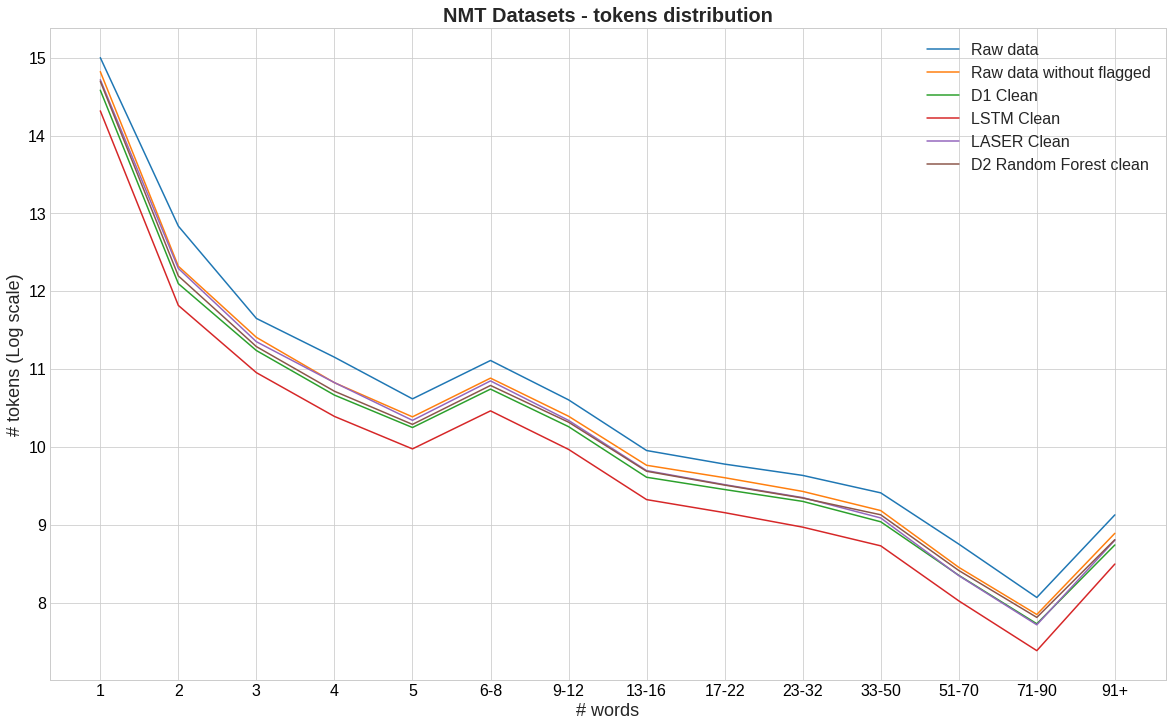

In [0]:
#rc('figure', figsize=(9, 6))
rc('figure', figsize=(20, 12))
rc('axes', titlesize = 20, labelsize = 18, titleweight = 'bold')
rc('xtick', labelsize = 16, color = 'black')
rc('ytick', labelsize = 16, color = 'black')
rc('legend', fontsize = 16, handlelength = 2)


plt.plot(data_flagged_not_flagged['# words'], np.log(data_flagged_not_flagged['% tokens']), label= 'Raw data' )
plt.plot(data_not_flagged['# words'], np.log(data_not_flagged['% tokens']), label= 'Raw data without flagged')
plt.plot(data_clean_flag_not_flagged['# words'], np.log(data_clean_flag_not_flagged['% tokens']), label= 'D1 Clean')
plt.plot(data_lstm_clean_flag_not_flagged['# words'], np.log(data_lstm_clean_flag_not_flagged['% tokens']), label= 'LSTM Clean')
plt.plot(data_laser_flag_not_flagged['# words'], np.log(data_laser_flag_not_flagged['% tokens']), label= 'LASER Clean')
plt.plot(data_D2randForest_clean_not_flagged['# words'], np.log(data_D2randForest_clean_not_flagged['% tokens']), label= 'D2 Random Forest clean')
plt.xlabel('# words')
plt.ylabel('# tokens (Log scale)')
plt.title('NMT Datasets - tokens distribution')

plt.legend(loc="upper right")


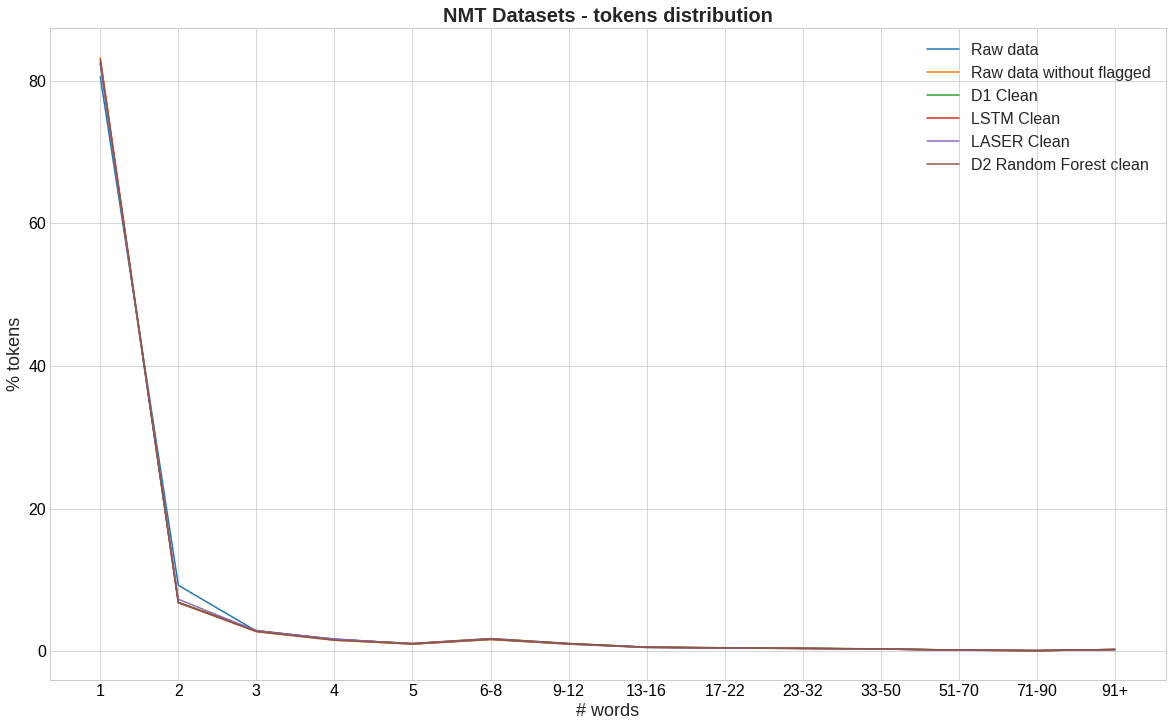

In [0]:
#rc('figure', figsize=(9, 6))
rc('figure', figsize=(20, 12))
rc('axes', titlesize = 20, labelsize = 18, titleweight = 'bold')
rc('xtick', labelsize = 16, color = 'black')
rc('ytick', labelsize = 16, color = 'black')
rc('legend', fontsize = 16, handlelength = 2)


plt.plot(data_flagged_not_flagged['# words'], data_flagged_not_flagged['% tokens'], label= 'Raw data' )
plt.plot(data_not_flagged['# words'], data_not_flagged['% tokens'], label= 'Raw data without flagged')
plt.plot(data_clean_flag_not_flagged['# words'], data_clean_flag_not_flagged['% tokens'], label= 'D1 Clean')
plt.plot(data_lstm_clean_flag_not_flagged['# words'], data_lstm_clean_flag_not_flagged['% tokens'], label= 'LSTM Clean')
plt.plot(data_laser_flag_not_flagged['# words'], data_laser_flag_not_flagged['% tokens'], label= 'LASER Clean')
plt.plot(data_D2randForest_clean_not_flagged['# words'], data_D2randForest_clean_not_flagged['% tokens'], label= 'D2 Random Forest clean')
plt.xlabel('# words')
plt.ylabel('% tokens')
plt.title('NMT Datasets - tokens distribution')

plt.legend(loc="upper right")

# KL Divergence between MegaCorpus and 14M Training Sample

In [122]:
import numpy as np
from scipy import stats

with open('BT_Domain_distribution.en-fr', 'rb') as handle:
    counts = pickle.load(handle)

with open('BT_Domain_14M_distribution.en-fr', 'rb') as handle:
    counts_14M = pickle.load(handle)

with open('BT_Domain_LSTM_distribution.en-fr', 'rb') as handle:
    counts_LSTM = pickle.load(handle)

with open('BT_Domain_LASER_distribution.en-fr', 'rb') as handle:
    counts_LASER = pickle.load(handle)

with open('BT_Domain_RandomForest_distribution.en-fr', 'rb') as handle:
    counts_RF = pickle.load(handle)


# missing Domains :
set(counts.keys()) - set(counts_14M.keys())

#Common domains :
counts.keys() & counts_14M.keys()

# Evaluate q_k and p_k values for KL :

def qk_pk(counts, counts_14M):

    qk=[]
    pk=[]
    for key_14 in counts_14M.keys():
        if key_14 in counts:
            qk.append(counts[key_14])
            pk.append(counts_14M[key_14])
    q_k = list(map((lambda x: x / np.sum(qk)), qk))
    p_k = list(map((lambda x: x / np.sum(pk)), pk))

    return p_k, q_k

all_data_vs_14M = qk_pk(counts, counts_14M)
all_data_vs_LSTM = qk_pk(counts, counts_LSTM)
all_data_vs_LASER = qk_pk(counts, counts_LASER)
all_data_vs_RF = qk_pk(counts, counts_RF)

print('Cross-Entropy All data and 14M : ',stats.entropy(all_data_vs_14M[0], all_data_vs_14M[1]))
print('\nCross-Entropy All data and LSTM : ',stats.entropy(all_data_vs_LSTM[0], all_data_vs_LSTM[1]))
print('\nCross-Entropy All data and LASER : ',stats.entropy(all_data_vs_LASER[0], all_data_vs_LASER[1]))
print('\nCross-Entropy All data and RF : ',stats.entropy(all_data_vs_RF[0], all_data_vs_RF[1]))
#0.011069468780077724
print('\n###########################################')
#KL :
def eval_KL(p_k, q_k, data_name):

    q_k = np.array(q_k)
    p_k = np.array(p_k)

    KL_model = (p_k * np.log(p_k/q_k)).sum()

    return print("\nKL for "+data_name+"  and Mega Corpus : " , KL_model)
    #return round(KL_model,3)

eval_KL(all_data_vs_14M[0], all_data_vs_14M[1],'14M')
eval_KL(all_data_vs_LSTM[0], all_data_vs_LSTM[1], 'LSTM')
eval_KL(all_data_vs_LASER[0], all_data_vs_LASER[1], 'LASER')
eval_KL(all_data_vs_RF[0], all_data_vs_RF[1], 'Random Forest')


Cross-Entropy All data and 14M :  0.011069468780077724

Cross-Entropy All data and LSTM :  0.009754498101197535

Cross-Entropy All data and LASER :  0.00902207547360698

Cross-Entropy All data and RF :  0.008329690591268436

###########################################

KL for 14M  and Mega Corpus :  0.011069468780077724

KL for LSTM  and Mega Corpus :  0.009754498101197343

KL for LASER  and Mega Corpus :  0.009022075473606846

KL for Random Forest  and Mega Corpus :  0.008329690591268436


In [0]:
def kl_plot(p_k, q_k):
    rc('figure', figsize=(6, 4))
    x_axis = np.arange(-0.1, 0.1, 0.001)
    # Mean = 0, SD = 2.
    dist_a = stats.norm.pdf(x_axis,np.mean(q_k),np.std(q_k))
    # Mean = 1, SD = 2
    dist_b = stats.norm.pdf(x_axis,np.mean(p_k),np.std(p_k))
    plt.plot(x_axis, dist_a)
    plt.plot(x_axis, dist_b)
    plt.fill_between(x_axis, dist_a, dist_b, where=dist_b>=dist_a, facecolor='green', interpolate=True)
    plt.fill_between(x_axis, dist_a, dist_b, where=dist_b<=dist_a, facecolor='blue', interpolate=True)
    #plt.show()

Text(0.5, 1.0, 'Dist : Mega Corpus and Random Forest (KL : 0.008)')

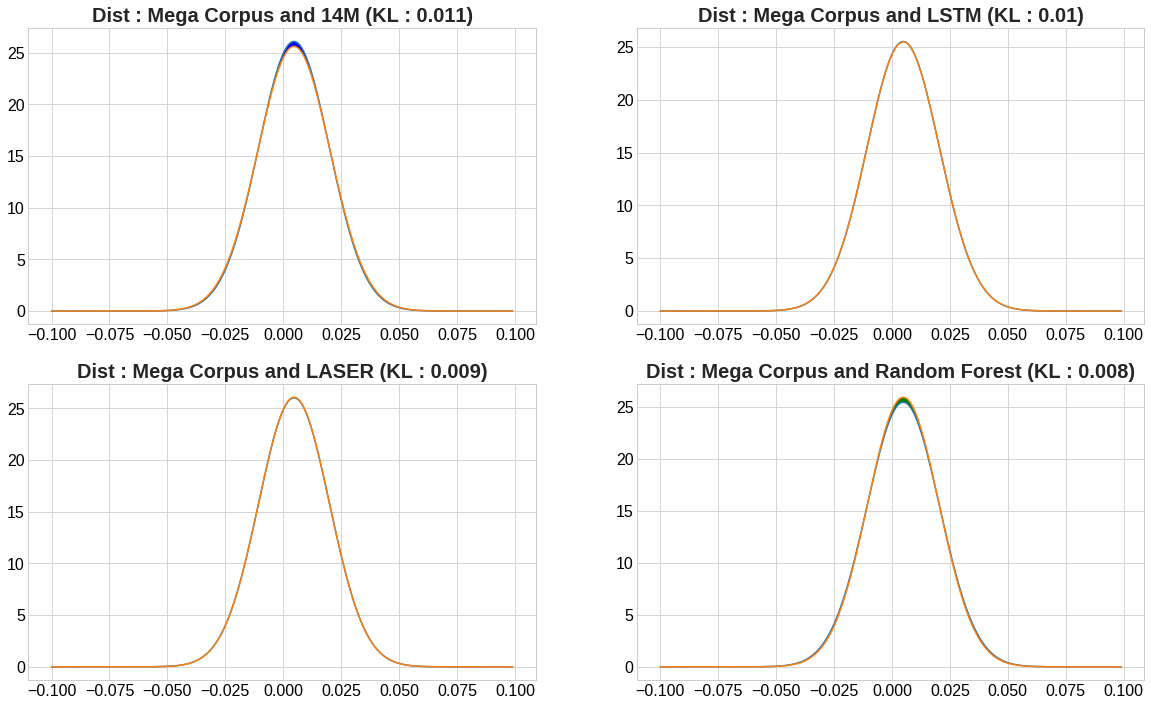

In [0]:
rc('figure', figsize=(20, 12))
fig, axs = plt.subplots(2, 2)
x_axis = np.arange(-0.1, 0.1, 0.001)

dist_a = stats.norm.pdf(x_axis,np.mean(all_data_vs_14M[1]),np.std(all_data_vs_14M[1]))
dist_b = stats.norm.pdf(x_axis,np.mean(all_data_vs_14M[0]),np.std(all_data_vs_14M[0]))
axs[0, 0].plot(x_axis, dist_a)
axs[0, 0].plot(x_axis, dist_b)
axs[0, 0].fill_between(x_axis, dist_a, dist_b, where=dist_b>=dist_a, facecolor='green', interpolate=True)
axs[0, 0].fill_between(x_axis, dist_a, dist_b, where=dist_b<=dist_a, facecolor='blue', interpolate=True)
axs[0, 0].set_title('Dist : Mega Corpus and 14M'+' (KL : '+str(eval_KL(all_data_vs_14M[0], all_data_vs_14M[1],'14M'))+')')

dist_a = stats.norm.pdf(x_axis,np.mean(all_data_vs_LSTM[1]),np.std(all_data_vs_LSTM[1]))
dist_b = stats.norm.pdf(x_axis,np.mean(all_data_vs_LSTM[0]),np.std(all_data_vs_LSTM[0]))
axs[0, 1].plot(x_axis, dist_a)
axs[0, 1].plot(x_axis, dist_b)
axs[0, 1].fill_between(x_axis, dist_a, dist_b, where=dist_b>=dist_a, facecolor='green', interpolate=True)
axs[0, 1].fill_between(x_axis, dist_a, dist_b, where=dist_b<=dist_a, facecolor='blue', interpolate=True)
axs[0, 1].set_title('Dist : Mega Corpus and LSTM'+' (KL : '+str(eval_KL(all_data_vs_LSTM[0], all_data_vs_LSTM[1], 'LSTM'))+')')

dist_a = stats.norm.pdf(x_axis,np.mean(all_data_vs_LASER[1]),np.std(all_data_vs_LASER[1]))
dist_b = stats.norm.pdf(x_axis,np.mean(all_data_vs_LASER[0]),np.std(all_data_vs_LASER[0]))
axs[1, 0].plot(x_axis, dist_a)
axs[1, 0].plot(x_axis, dist_b)
axs[1, 0].fill_between(x_axis, dist_a, dist_b, where=dist_b>=dist_a, facecolor='green', interpolate=True)
axs[1, 0].fill_between(x_axis, dist_a, dist_b, where=dist_b<=dist_a, facecolor='blue', interpolate=True)
axs[1, 0].set_title('Dist : Mega Corpus and LASER'+' (KL : '+str(eval_KL(all_data_vs_LASER[0], all_data_vs_LASER[1], 'LASER'))+')')

dist_a = stats.norm.pdf(x_axis,np.mean(all_data_vs_RF[1]),np.std(all_data_vs_RF[1]))
dist_b = stats.norm.pdf(x_axis,np.mean(all_data_vs_RF[0]),np.std(all_data_vs_RF[0]))
axs[1, 1].plot(x_axis, dist_a)
axs[1, 1].plot(x_axis, dist_b)
axs[1, 1].fill_between(x_axis, dist_a, dist_b, where=dist_b>=dist_a, facecolor='green', interpolate=True)
axs[1, 1].fill_between(x_axis, dist_a, dist_b, where=dist_b<=dist_a, facecolor='blue', interpolate=True)
axs[1, 1].set_title('Dist : Mega Corpus and Random Forest'+' (KL : '+str(eval_KL(all_data_vs_RF[0], all_data_vs_RF[1], 'Random Forest'))+')')